<a href="https://colab.research.google.com/github/Gera9999/AnalisisDatosPacientes/blob/main/AnalisisPacientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Cargar el archivo CSV
try:
    df = pd.read_csv('/consolidado_anonimizado.csv')
    print("Archivo cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo no se encontró. Asegúrate de que la ruta sea correcta.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo cargado exitosamente.


/tmp/ipython-input-8-1289035288.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/consolidado_anonimizado.csv')


Exploracion Inicial.
Ver las primeras filas y las columnas. Una visualizacion general de los datos

In [9]:
 df.head()

,fecha_atencion,hora_atencion,estado,especialidad,activ.agendable,Unidad de Dependencia,nom_prof,paciente,dv_pac,nom_pac,sexo_pac,edad_año,actvi.rem,primera_año,codigo diagnostico,diagnostico,Unnamed: 74
0,01/02/2024,00:10,EJECUTADA,SALUD MENTAL (ESPECIALIDAD),COSAM NORTE CONSULTA SALUD MENTAL INFANTIL,NaN,BARBARA JAVIERA,85.822.422-5,8,Digna Poblete Silva,FEMENINO,9.0,CONTROL SALUD MENTAL AT. ESPECIALIDAD INFANTIL,NaN,NaN,NaN,NaN
1,01/02/2024,00:20,EJECUTADA,SALUD MENTAL (ESPECIALIDAD),COSAM NORTE CONSULTA SALUD MENTAL INFANTIL,NaN,BARBARA JAVIERA,14.942.613-2,4,Francisca Mariela González Vásquez,MASCULINO,19.0,CONTROL SALUD MENTAL AT. ESPECIALIDAD INFANTIL,NaN,NaN,NaN,NaN
2,01/02/2024,07:28,EJECUTADA,ENDOCRINOLOGIA,ENDOCRINOLOGIA ADULTO,ENDOCRINOLOGIA,ELENA MERCEDES,3.356.896-7,7,Amparo María Hernández Becerra,FEMENINO,69.0,ENDOCRINOLOGIA ADULTO,NaN,M819,OSTEOPOROSIS,NaN
3,01/02/2024,07:37,EJECUTADA,PROCEDIMIENTO APOYO TERAPEUTICO,CORSET,NaN,LUIS,99.529.233-5,4,Germán Víctor Muñoz Pérez,FEMENINO,17.0,PROCEDIMIENTO CIRUGIA INFANTIL,NaN,M419,ESCOLIOSIS,NaN
4,01/02/2024,07:39,EJECUTADA,PROCEDIMIENTO APOYO TERAPEUTICO,CORSET,NaN,LUIS,36.913.820-0,6,Javiera Ramírez Osorio,FEMENINO,13.0,PROCEDIMIENTO CIRUGIA INFANTIL,NaN,M419,ESCOLIOSIS,NaN


Verificar columnas y filas con datos nulos. (datos nulos en toda la fila o columna, para eliminar)

In [10]:
# Verificar columnas con todos los datos nulos
columnas_totalmente_nulas = df.columns[df.isnull().all()].tolist()
print(f"Columnas con todos los datos nulos: {columnas_totalmente_nulas}")

# Verificar filas con todos los datos nulos
filas_totalmente_nulas = df[df.isnull().all(axis=1)]
print(f"Número de filas con todos los datos nulos: {filas_totalmente_nulas.shape[0]}")

# Opcional: Ver las primeras filas totalmente nulas (si existen)
if not filas_totalmente_nulas.empty:
    print("Primeras filas totalmente nulas:")
    display(filas_totalmente_nulas.head())

# Para eliminar columnas totalmente nulas
# df_sin_columnas_nulas = df.dropna(axis=1, how='all')

# Para eliminar filas totalmente nulas
# df_sin_filas_nulas = df.dropna(axis=0, how='all')

Columnas con todos los datos nulos: ['Unnamed: 74']
Número de filas con todos los datos nulos: 0


 Informacion General: para conocer el número de filas y columnas, los tipos de datos de cada columna y si hay valores no nulos. Esto ayudará a identificar columnas numéricas, categóricas, etc

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126548 entries, 0 to 126547
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_atencion         126548 non-null  object 
 1   hora_atencion          126548 non-null  object 
 2   estado                 126548 non-null  object 
 3   especialidad           126548 non-null  object 
 4   activ.agendable        126548 non-null  object 
 5   Unidad de Dependencia  64975 non-null   object 
 6   nom_prof               126547 non-null  object 
 7   paciente               126547 non-null  object 
 8   dv_pac                 126547 non-null  object 
 9   nom_pac                126547 non-null  object 
 10  sexo_pac               126547 non-null  object 
 11  edad_año               126547 non-null  float64
 12  actvi.rem              126547 non-null  object 
 13  primera_año            26 non-null      object 
 14  codigo diagnostico     79345 non-nul

Estadisticas Descriptivas.
dará un resumen estadístico de las columnas numéricas (conteo, media, desviación estándar, mínimo, cuartiles, máximo).

# En este caso, por el tipo de dato, no muestra datos relevantes...

In [12]:
df.describe()

,edad_año,Unnamed: 74
count,126547.000000,0.0
mean,46.477830,NaN
std,24.690182,NaN
min,0.000000,NaN
25%,26.000000,NaN
50%,51.000000,NaN
75%,67.000000,NaN
max,101.000000,NaN


Identificar valores faltantes: para ver cuántos valores faltantes hay en cada columna.
Decidir cómo manejarlos: Dependiendo de la cantidad de valores faltantes y la naturaleza de la columna, considerar eliminarlos (filas o columnas), imputarlos (reemplazarlos por la media, mediana, moda, etc.) o dejarlos como están por ahora.

In [13]:
df.isnull().sum()

,0
fecha_atencion,0
hora_atencion,0
estado,0
especialidad,0
activ.agendable,0
Unidad de Dependencia,61573
nom_prof,1
paciente,1
dv_pac,1
nom_pac,1


In [14]:
df['sexo_pac'].value_counts()

,count
sexo_pac,
FEMENINO,74296
MASCULINO,52251


In [15]:
import seaborn as sns

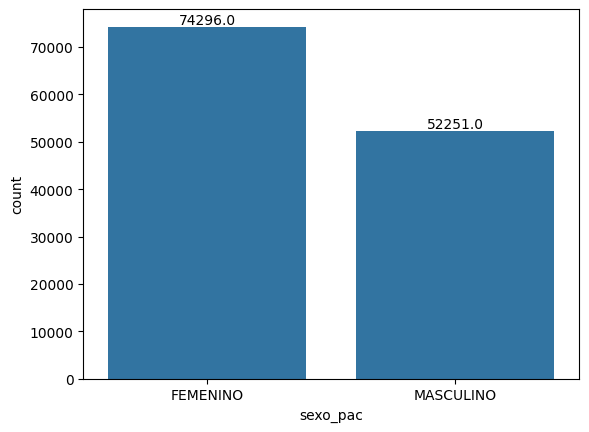

In [16]:
import matplotlib.pyplot as plt

# Crear el countplot
ax = sns.countplot(data=df, x='sexo_pac')

# Añadir los montos a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostrar el gráfico
plt.show()

In [17]:
df['diagnostico'].value_counts().head(20)

,count
diagnostico,
SUPERVISION DE EMBARAZO DE ALTO RIESGO,2149
INSUFICIENCIA RENAL HEMODIALISIS CRONICA,2031
"ANOMALIA, DENTOFACIAL",1686
DIENTES INCLUIDOS,1365
CANCER DE LA MAMA,1290
HISTORIA PERSONAL DE USO (PRESENTE) DE ANTICOAGULANTES POR LARGO TIEMPO,1138
HIPOACUSIA BILATERAL,957
PRESENCIA MARCAPASO CARDIACO,895
CANCER DE LA PROSTATA,829


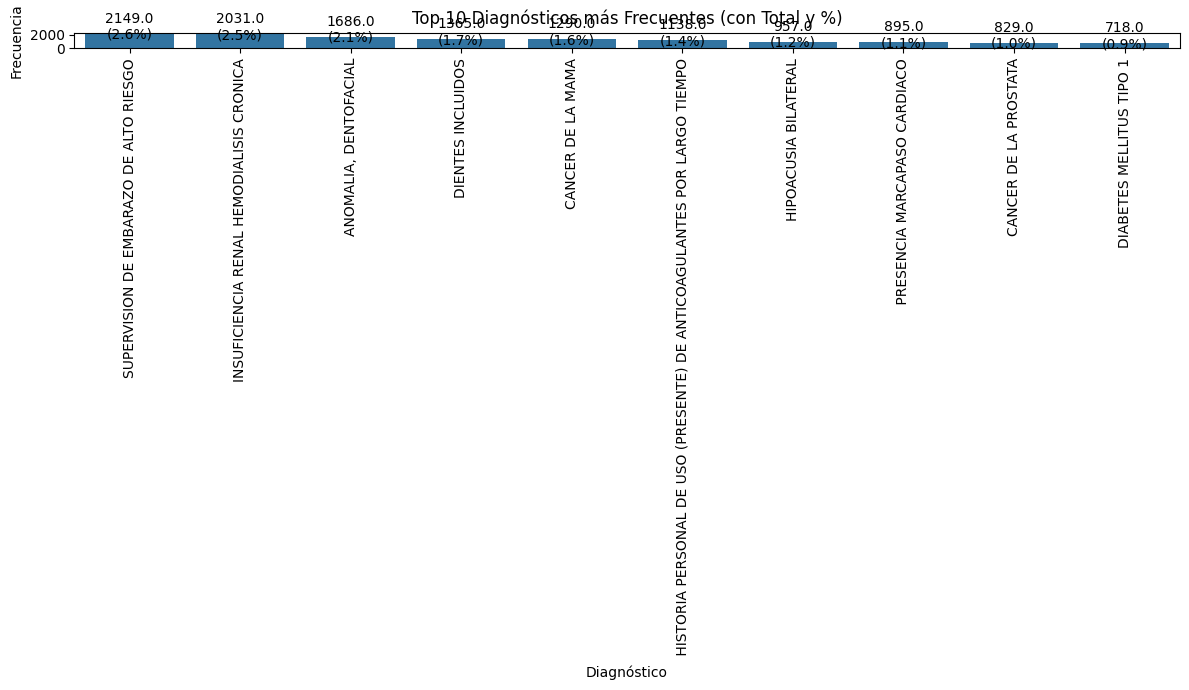

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que df ya está cargado y contiene la columna 'diagnostico'

top_diagnosticos = df['diagnostico'].value_counts().head(10)
total_diagnosticos = df['diagnostico'].count() # Obtener el total de diagnósticos no nulos

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_diagnosticos.index, y=top_diagnosticos.values)

# Añadir el total y el porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_diagnosticos) * 100 if total_diagnosticos > 0 else 0 # Calcular el porcentaje
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Top 10 Diagnósticos más Frecuentes (con Total y %)')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [19]:
df['diagnostico'].isnull().sum()

np.int64(44687)

In [20]:
conteo_diagnosticos_no_nulos = df['diagnostico'].count()
print(f"Número de diagnósticos no nulos: {conteo_diagnosticos_no_nulos}") # Asegúrate de que esta línea no tenga indentación
total_filas = df.shape[0]
print(f"Número total de filas en el DataFrame: {total_filas}") # Asegúrate de que esta línea no tenga indentación

# Opcional: Calcular y mostrar la diferencia y el resultado de isnull().sum()
valores_nulos_verificacion = total_filas - conteo_diagnosticos_no_nulos
print(f"Diferencia (valores que deberían ser nulos): {valores_nulos_verificacion}") # Asegúrate de que esta línea no tenga indentación
print(f"Número de valores nulos reportado por isnull().sum(): {df['diagnostico'].isnull().sum()}") # Asegúrate de que esta línea no tenga indentación

Número de diagnósticos no nulos: 81861
Número total de filas en el DataFrame: 126548
Diferencia (valores que deberían ser nulos): 44687
Número de valores nulos reportado por isnull().sum(): 44687


In [21]:
total_filas = df.shape[0]
total_filas = df.shape[0]
print(f"Número total de filas en el DataFrame: {total_filas}") # Esta línea no debe tener indentación
# Las siguientes líneas tampoco deben tener indentación
# valores_nulos_verificacion = total_filas - conteo_diagnosticos_no_nulos
# print(f"Diferencia (valores que deberían ser nulos): {valores_nulos_verificacion}")
# print(f"Número de valores nulos reportado por isnull().sum(): {df['diagnostico'].isnull().sum()}")

Número total de filas en el DataFrame: 126548


In [22]:
# Borrar filas donde la columna 'diagnostico' tiene valores nulos
df_sin_diagnostico_nulo = df.dropna(subset=['diagnostico'])

# Opcional: Mostrar cuántas filas se eliminaron
filas_originales = df.shape[0]
filas_despues = df_sin_diagnostico_nulo.shape[0]
filas_eliminadas = filas_originales - filas_despues

print(f"Número de filas original: {filas_originales}")
print(f"Número de filas después de eliminar nulos en 'diagnostico': {filas_despues}")
print(f"Número de filas eliminadas debido a nulos en 'diagnostico': {filas_eliminadas}")

# Ahora, df_sin_diagnostico_nulo es tu nuevo DataFrame sin filas con diagnóstico nulo
# Puedes continuar tu análisis con df_sin_diagnostico_nulo

Número de filas original: 126548
Número de filas después de eliminar nulos en 'diagnostico': 81861
Número de filas eliminadas debido a nulos en 'diagnostico': 44687


/tmp/ipython-input-23-4204032838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_diagnosticos_conteo.index, y=top_diagnosticos_conteo.values, palette='viridis') # Usamos barplot con los conteos


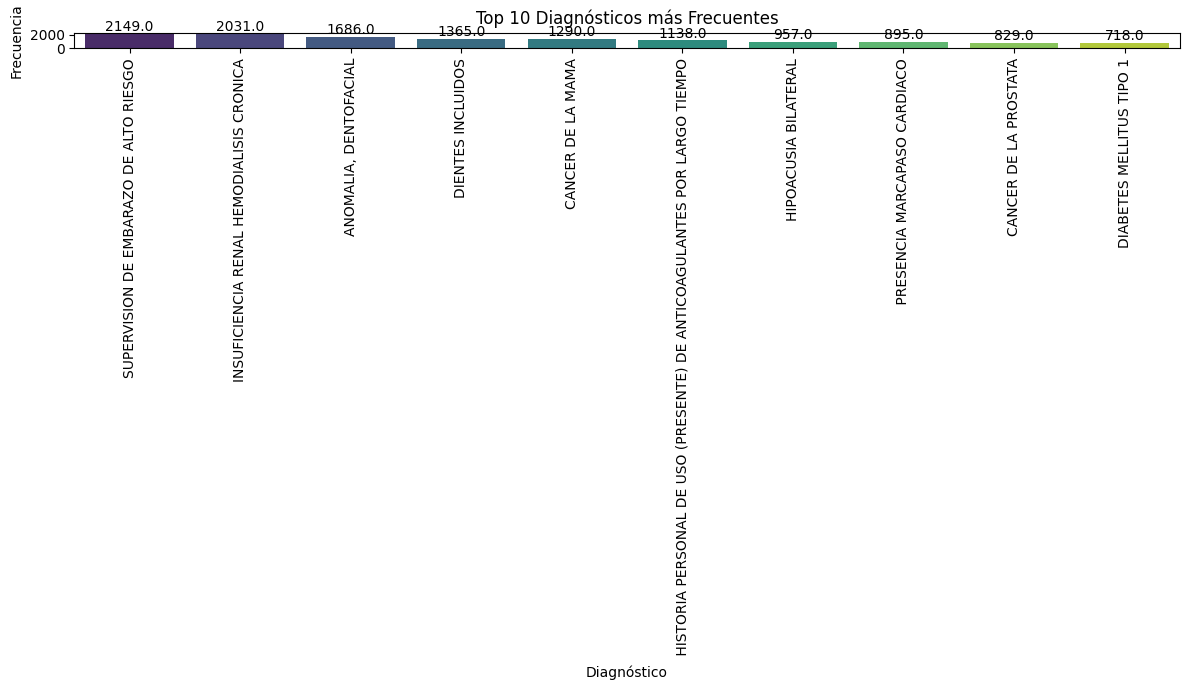

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 10 diagnósticos más frecuentes y sus conteos
top_n = 10
top_diagnosticos_conteo = df['diagnostico'].value_counts().head(top_n)

plt.figure(figsize=(12, 7)) # Ajusta el tamaño de la figura si es necesario

# Crear el gráfico de barras
ax = sns.barplot(x=top_diagnosticos_conteo.index, y=top_diagnosticos_conteo.values, palette='viridis') # Usamos barplot con los conteos

# Opcional: Añadir los conteos encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90) # Rota las etiquetas del eje x para mejor legibilidad si son largas
plt.title(f'Top {top_n} Diagnósticos más Frecuentes')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se solapen
plt.show()

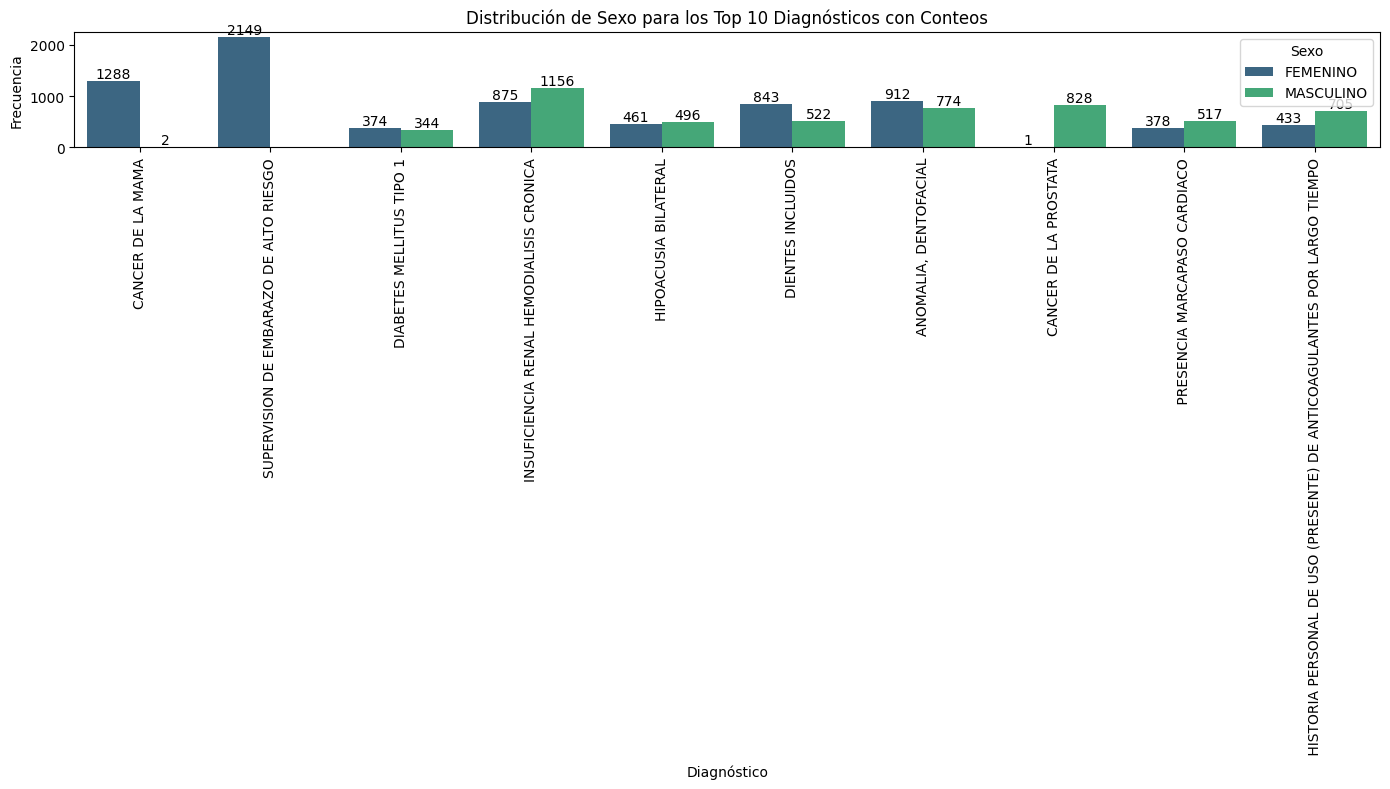

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener los diagnósticos más frecuentes (puedes ajustar el número N)
top_n = 10
top_diagnosticos = df['diagnostico'].value_counts().head(top_n).index.tolist()

# Filtrar el DataFrame para incluir solo los diagnósticos del top N
df_top_diagnosticos = df[df['diagnostico'].isin(top_diagnosticos)]

plt.figure(figsize=(14, 8)) # Ajusta el tamaño de la figura si es necesario

# Crear el gráfico de barras agrupadas por sexo
ax = sns.countplot(data=df_top_diagnosticos, x='diagnostico', hue='sexo_pac', palette='viridis')

# Opcional: Ajustar leyenda y título
plt.title(f'Distribución de Sexo para los Top {top_n} Diagnósticos con Conteos')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90) # Rota las etiquetas del eje x
plt.legend(title='Sexo') # Asegúrate de que la leyenda esté clara
plt.tight_layout()

# Añadir los conteos a cada sub-barra
for container in ax.containers:
    ax.bar_label(container)

plt.show()